In [8]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import numpy as n
import pandas as pd
from scipy import stats
import env

ModuleNotFoundError: No module named 'env'



1 A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.

What is the probability that no cars drive up in the noon hour?
What is the probability that 3 or more cars come through the drive through?
How likely is it that the drive through gets at least 1 car?


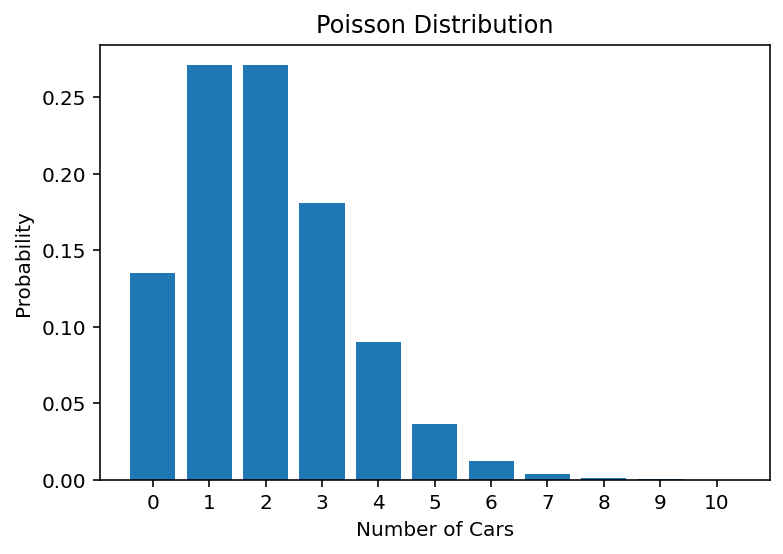

In [4]:
λ = 2

x = np.arange(0, 11)
y = stats.poisson(λ).pmf(x)


plt.bar(x, y)
plt.title('Poisson Distribution')
plt.xlabel('Number of Cars')
plt.ylabel('Probability')
plt.xticks(x)
plt.show()







Text(3, 0.22, '$P(X = 0) = 0.135$')

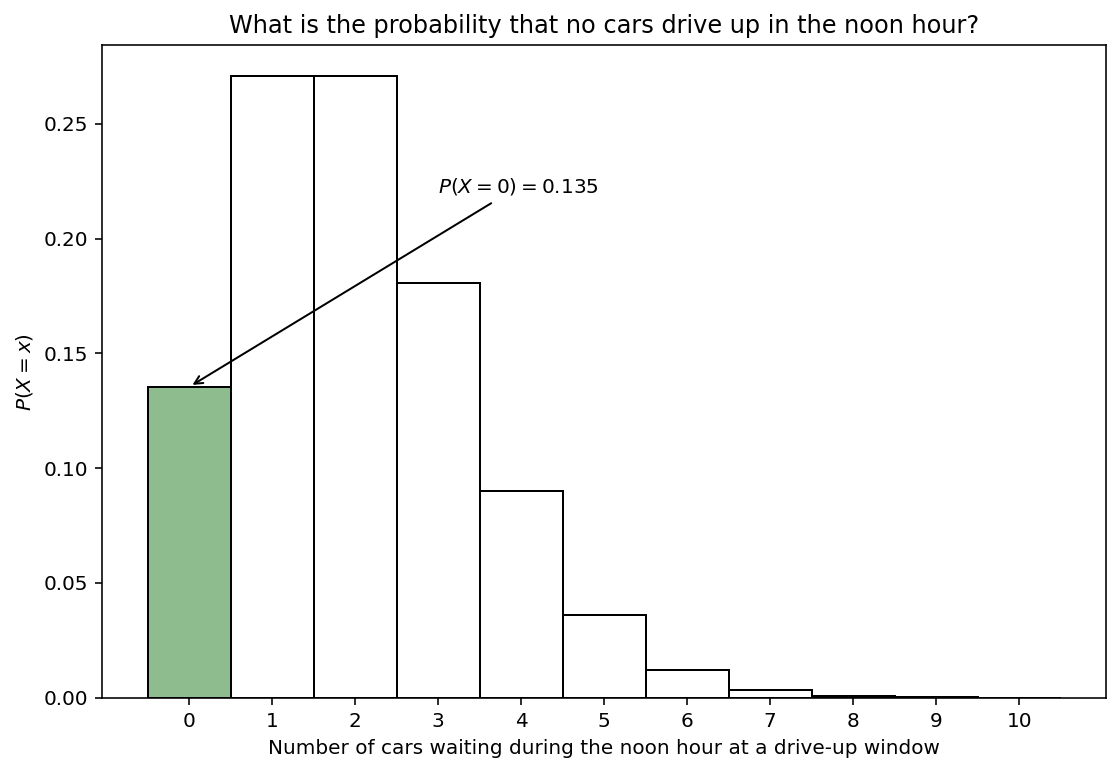

In [11]:
# What is the probability that no cars drive up in the noon hour?


stats.poisson(λ).sf(0)

mu = 3.0
sigma = 0.3

plt.figure(figsize=(9, 6))
plt.bar(
    x,
    y,
    edgecolor='black',
    color='white',
    width=1
)
plt.xticks(x)
plt.ylabel('$P(X = x)$')
plt.xlabel('Number of cars waiting during the noon hour at a drive-up window')
plt.title('What is the probability that no cars drive up in the noon hour?')
plt.bar(
    0,
    stats.poisson(λ).pmf(0),
    width=1,
    color='darkseagreen',
    edgecolor='black'
)
plt.annotate(
    f'$P(X = 0) = {stats.poisson(λ).pmf(0):.3f}$',
    (0, stats.poisson(2).pmf(0)),
    xytext=(3, .22),
    arrowprops={'arrowstyle': '->'}
)





2 Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

What grade point average is required to be in the top 5% of the graduating class?
What GPA constitutes the bottom 15% of the class?
An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?
If I have a GPA of 3.5, what percentile am I in?


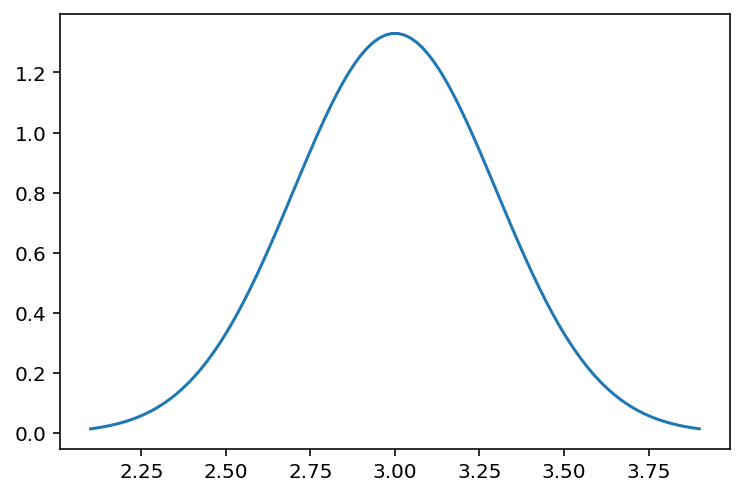

In [12]:
mu = 3.0
sigma = .3
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y)
plt.show()




3 A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?


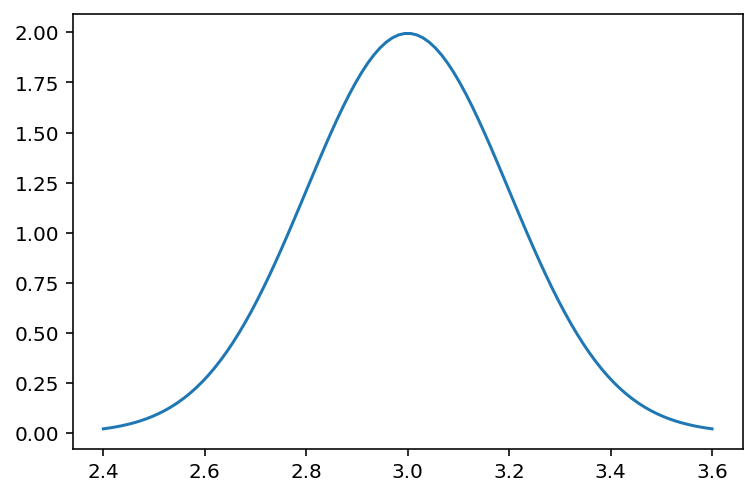

In [13]:
mu = 3.0
sigma = 0.2

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)

plt.plot(x, y)
plt.show()




4
random probabilities
100 questions, rounded to the hundreths place.

What is the probability that at least one of your first 60 answers is correct?




In [23]:
n = 60
p = 0.01
k = np.arange(0, 61)
binomial = stats.binom(n, p)
binomial.sf(0)

0.45284335760923855



5
round(.9 * 22 * 3)
How likely is it that it goes two days without getting cleaned up?
All week?

In [31]:
round(.9 * 22 * 3)


59


6 You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.


In [9]:
stats.binom(n * 5, p).pmf(0)

TypeError: unsupported operand type(s) for *: 'module' and 'int'

In [6]:
mean = 15 * 2
std_dev = 3 * 2

In [5]:
stats.norm(mean, std_dev).cdf(33)


0.6914624612740131



7  Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

In [10]:
url = env.get_db_url('employees')
query = '''
SELECT *
FROM salaries s
WHERE s.to_date > NOW()
'''
salaries = pd.read_sql(query, url)

NameError: name 'env' is not defined

In [ ]:
salaries

salaries
What percent of employees earn less than 60,000?
What percent of employees earn more than 95,000?
What percent of employees earn between 65,000 and 80,000?
What do the top 5% of employees make?


In [ ]:
stats.norm(mean, std_dev).cdf(60_000)

In [ ]:
stats.norm(mean, std_dev).sf(95_000)

In [ ]:
np.diff(stats.norm(mean, std_dev).cdf([65000, 80000]))

In [ ]:
stats.norm(mean, std_dev).isf(0.05)

In [ ]:
salaries.salary.quantile(0.95)

In [ ]:
salaries.salary.hist()
pd.Series(stats.norm(mean, std_dev).rvs(240124)).hist(alpha = 0.5)



Hint If you're looking at this exercise and wondering "How do I get pandas to talk the database, again?", remember that you'll need 3 things: your .gitignore, your env.py, and to use pd.read_sql. Copy over your .gitignore and env.py from your data science libraries exercises folder, and connect to the employees database like so:


import pandas as pd
import env

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'
pd.read_sql('SELECT * FROM departments', url)